In [6]:
!pip install pywavelets
!pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
from skimage.data import camera
from skimage.util import random_noise

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

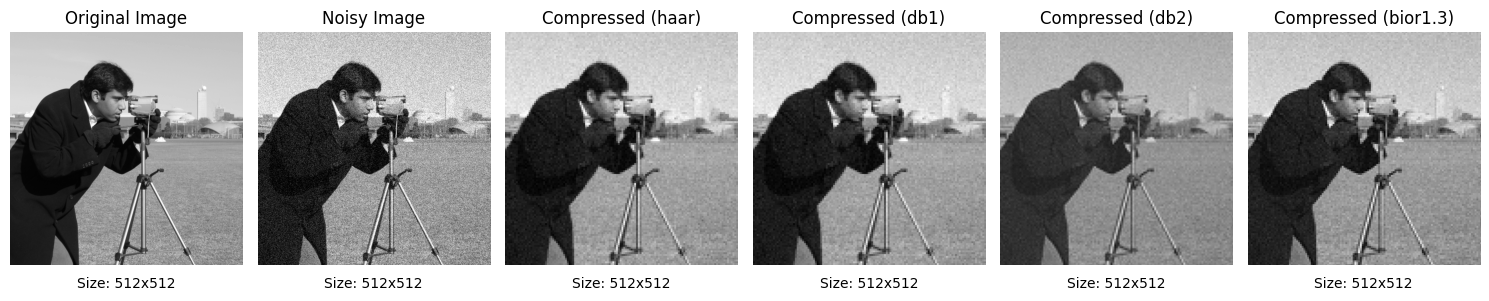

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage.data import camera
from skimage.util import random_noise

# Function to perform 2D DWT and image compression
def dwt_compression(image, wavelet_name, threshold):
    # Perform 2D Discrete Wavelet Transform
    coeffs2 = pywt.wavedec2(image, wavelet_name, level=2)
    
    # Apply thresholding to the detail coefficients
    coeffs2_thresh = [coeffs2[0]]  # Approximation coefficients remain unchanged
    for detail_level in coeffs2[1:]:
        cH, cV, cD = detail_level
        cH_thresh = pywt.threshold(cH, threshold, mode='soft')
        cV_thresh = pywt.threshold(cV, threshold, mode='soft')
        cD_thresh = pywt.threshold(cD, threshold, mode='soft')
        coeffs2_thresh.append((cH_thresh, cV_thresh, cD_thresh))
    
    # Reconstruct the image using Inverse Discrete Wavelet Transform
    compressed_image = pywt.waverec2(coeffs2_thresh, wavelet_name)
    
    return compressed_image

# Load an example image
image = camera()

# Add Gaussian noise for visualization purposes
sigma = 0.1
noisy_image = random_noise(image, mode='gaussian', var=sigma**2)

# List of wavelets to be used
wavelets = ['haar', 'db1', 'db2', 'bior1.3']
# Set a threshold for compression
threshold = 20

# Plot original, noisy, and compressed images
fig, axes = plt.subplots(1, len(wavelets) + 2, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')
# Display size of original image
axes[0].text(0.5, -0.1, f'Size: {image.shape[1]}x{image.shape[0]}', ha='center', transform=axes[0].transAxes)

# Noisy image
axes[1].imshow(noisy_image, cmap=plt.cm.gray)
axes[1].set_title('Noisy Image')
axes[1].axis('off')
# Display size of noisy image
axes[1].text(0.5, -0.1, f'Size: {noisy_image.shape[1]}x{noisy_image.shape[0]}', ha='center', transform=axes[1].transAxes)

# Compressed images with different wavelets
for i, wavelet in enumerate(wavelets, start=2):
    compressed_image = dwt_compression(noisy_image, wavelet, threshold)
    axes[i].imshow(compressed_image, cmap=plt.cm.gray)
    axes[i].set_title(f'Compressed ({wavelet})')
    axes[i].axis('off')
    # Display size of compressed image
    axes[i].text(0.5, -0.1, f'Size: {compressed_image.shape[1]}x{compressed_image.shape[0]}', ha='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()


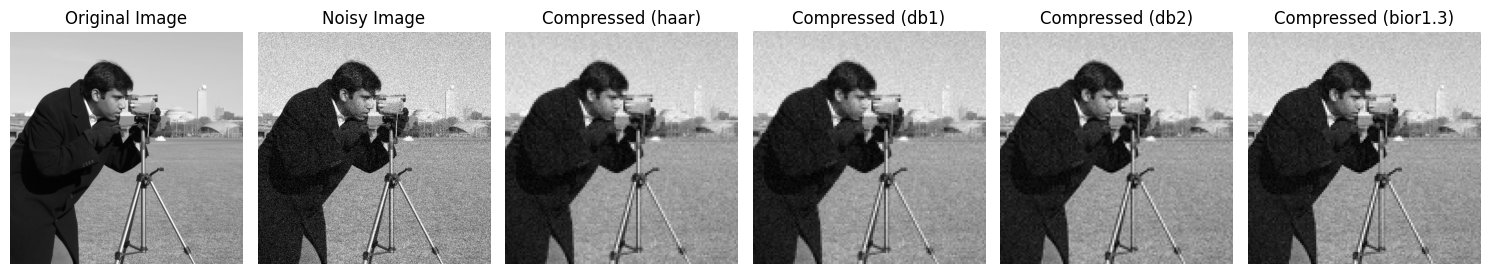

In [47]:
import os
import cv2
# Function to perform 2D DWT and image compression
def dwt_compression(image, wavelet_name, threshold):
    # Perform 2D Discrete Wavelet Transform
    coeffs2 = pywt.wavedec2(image, wavelet_name, level=2)
    
    # Apply thresholding to the detail coefficients
    coeffs2_thresh = [coeffs2[0]]  # Approximation coefficients remain unchanged
    for detail_level in coeffs2[1:]:
        cH, cV, cD = detail_level
        cH_thresh = pywt.threshold(cH, threshold, mode='soft')
        cV_thresh = pywt.threshold(cV, threshold, mode='soft')
        cD_thresh = pywt.threshold(cD, threshold, mode='soft')
        coeffs2_thresh.append((cH_thresh, cV_thresh, cD_thresh))
    
    # Reconstruct the image using Inverse Discrete Wavelet Transform
    compressed_image = pywt.waverec2(coeffs2_thresh, wavelet_name)
    
    return compressed_image

# Load an example image
image = camera()


# Add Gaussian noise for visualization purposes
sigma = 0.1
noisy_image = random_noise(image, mode='gaussian', var=sigma**2)

# List of wavelets to be used
wavelets = ['haar', 'db1', 'db2', 'bior1.3']
# Set a threshold for compression
threshold = 20

# Plot original, noisy, and compressed images
fig, axes = plt.subplots(1, len(wavelets) + 2, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Noisy image
axes[1].imshow(noisy_image, cmap=plt.cm.gray)
axes[1].set_title('Noisy Image')
axes[1].axis('off')


# Compressed images with different wavelets
for i, wavelet in enumerate(wavelets, start=2):
    compressed_image = dwt_compression(noisy_image, wavelet, threshold)
    compressed_image = np.clip(compressed_image, 0, 1)
    compressed_image_uint8 = img_as_ubyte(compressed_image)

    axes[i].imshow(compressed_image, cmap=plt.cm.gray)
    axes[i].set_title(f'Compressed ({wavelet})')
    axes[i].axis('off')

    cv2.imwrite(f'compressed_{wavelet}.jpg', compressed_image_uint8)
    
noisy_image = np.clip(noisy_image, 0, 1)
noisy_image_uint8 = img_as_ubyte(noisy_image)
cv2.imwrite(f'noisy.jpeg', noisy_image_uint8)
plt.tight_layout()
plt.show()